### Exploring Our Data

In [1]:
import pandas as pd

In [2]:
def get_lines():
    with open('kickstarter-projects/ks-projects-201612.csv', 'rb') as f:
        for line in f: 
            yield line

In [3]:
def get_weird_lines():
    for i, line in enumerate(get_lines()):
        for char in line: 
            if char > 127:
                yield line

In [4]:
weird_lines = get_weird_lines()

In [5]:
next(weird_lines)

b'1000235643,HIIT Bottle\x99,Drinks,Food,USD,2015-04-27 19:33:08,15000,2015-03-13 18:33:08,124998,successful,2784,US,124998,,,,\r\n'

In [6]:
line = next(weird_lines)[1]


In [7]:
df_2016 = pd.read_csv('kickstarter-projects/ks-projects-201612.csv', encoding ='iso-8859-1')

/Users/sherzyang/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df_2016.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [9]:
df_2016 = df_2016.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'], axis=1)

In [10]:
df_2016 = df_2016.rename(columns={'ID ': 'ID', 'name ': 'name', 'category ': 'category', 
                        'main_category ': 'main_category', 'currency ': 'currency',
                        'deadline ': 'deadline', 'goal ': 'goal', 'launched ': 'launched',
                        'pledged ': 'pledged', 'state ': 'state', 'backers ': 'backers',
                        'country ': 'country', 'usd pledged ':'usd_pledged'})

In [11]:
df_2016_all = df_2016.loc[(df_2016['state'] == 'failed') | 
                      (df_2016['state'] == 'canceled') | 
                      (df_2016['state'] == 'successful') | 
                      (df_2016['state'] == 'live') | 
                      (df_2016['state'] == 'suspended') | 
                      (df_2016['state'] == 'undefined')]

#The 2016 data set is very unreliable across the dataframe

### We are going to use our 2018 data set instead 

In [76]:
import collections
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn import tree
#import pydotplus
import pandas as pd
import numpy as np

In [77]:
df_2018 = pd.read_csv('kickstarter-projects/ks-projects-201801.csv', encoding ='iso-8859-1')

In [78]:
df_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [79]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [80]:
#Detects the live in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='live']

#Detects the undefined in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='undefined']

#Detects the undefined in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='canceled']

#Detects the undefined in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='suspended']

#Detects the undefined in usd pledged and drops them 
df_2018 = df_2018.loc[~df_2018['usd pledged'].isna(), :]

#Detects the undefined in usd pledged and drops them 
df_2018 = df_2018.loc[~df_2018['name'].isna(), :]

### A look at successes and failures by main category

In [81]:
df_2018['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Crafts', 'Games',
       'Design', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [82]:
successful_df = df_2018.loc[df_2018['state'] =='successful']

In [83]:
failed_df = df_2018.loc[df_2018['state'] =='failed']

In [84]:
successful_list = successful_df['main_category'].tolist()

In [85]:
failed_list = failed_df['main_category'].tolist()

In [86]:
from collections import Counter
list1=successful_list
counts_s = Counter(list1)
print(counts_s)

Counter({'Music': 24105, 'Film & Video': 23612, 'Games': 12518, 'Publishing': 12300, 'Art': 11510, 'Design': 10549, 'Theater': 6534, 'Technology': 6433, 'Food': 6085, 'Comics': 5842, 'Fashion': 5593, 'Photography': 3305, 'Dance': 2338, 'Crafts': 2115, 'Journalism': 1012})


In [87]:
list2=failed_list
counts_f = Counter(list2)
print(counts_f)

Counter({'Film & Video': 32891, 'Publishing': 23113, 'Music': 21696, 'Technology': 20613, 'Games': 16002, 'Food': 15969, 'Design': 14814, 'Fashion': 14181, 'Art': 14130, 'Photography': 6384, 'Crafts': 5703, 'Comics': 4036, 'Theater': 3708, 'Journalism': 3136, 'Dance': 1235})


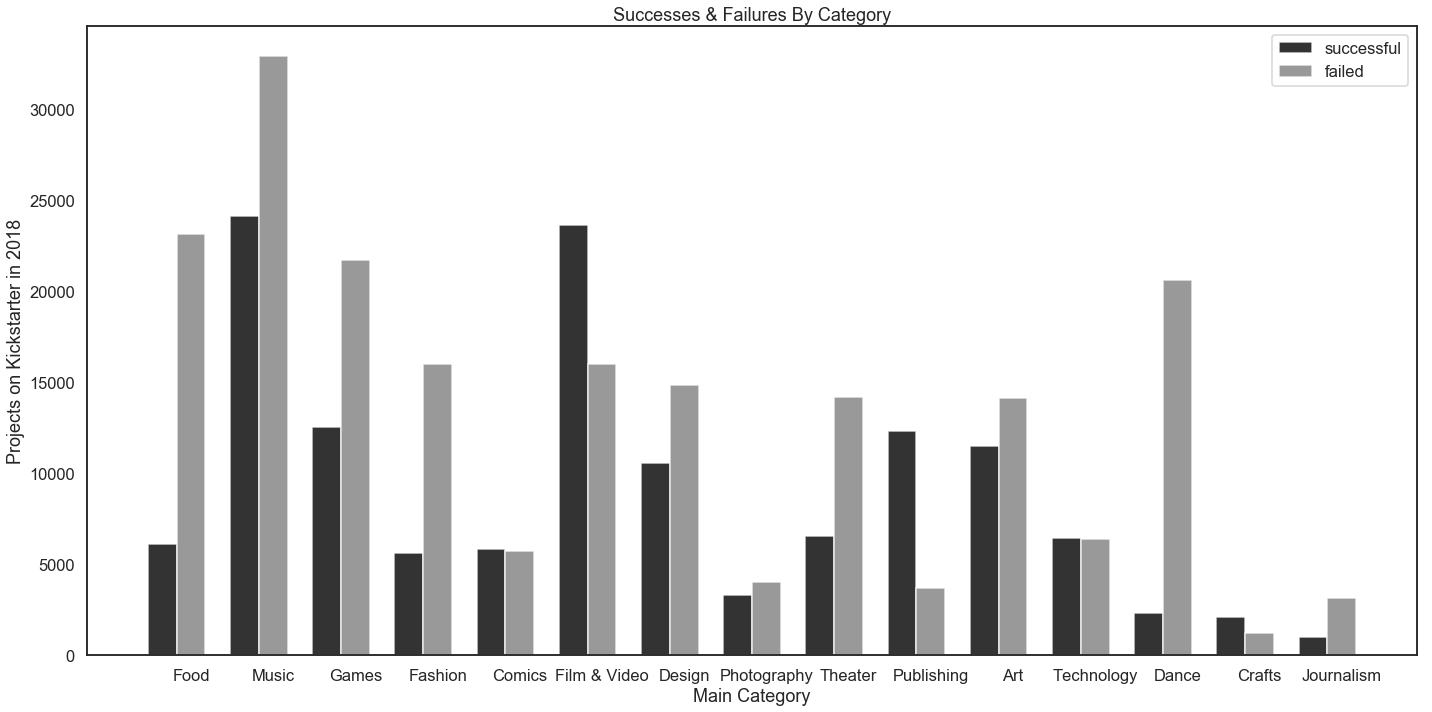

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 15
successful = counts_s.values()
failed = counts_f.values()

# create plot
fig, ax = plt.subplots(figsize=(20,10))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, successful, bar_width,
alpha=opacity,
color='black',
label='successful')

rects2 = plt.bar(index + bar_width, failed, bar_width,
alpha=opacity,
color='grey',
label='failed')

plt.xlabel('Main Category')
plt.ylabel('Projects on Kickstarter in 2018')
plt.title('Successes & Failures By Category')
plt.xticks(index + bar_width, counts_s.keys())
plt.legend()

plt.tight_layout()
plt.show()


In [89]:
successes_tuples = [(key, value) for (key, value) in sorted(counts_s.items())]

In [90]:
failed_tuples = [(key, value) for (key, value) in sorted(counts_f.items())]

In [91]:
difference = []
for i in range(15):
    numerator = list(successes_tuples[i])[1] - list(failed_tuples[i])[1]
    denominator = list(successes_tuples[i])[1] + list(failed_tuples[i])[1]
    temp = numerator/denominator
    difference.append(temp)


In [92]:
category_names = list(dict(successes_tuples).keys())

In [93]:
keys = category_names
values = difference
dictionary = dict(zip(keys, values))
print(dictionary)

{'Art': -0.10218408736349453, 'Comics': 0.18283053249645678, 'Crafts': -0.4589409056024559, 'Dance': 0.30870417016512736, 'Design': -0.16815834089027323, 'Fashion': -0.43430767674724385, 'Film & Video': -0.1642213687768791, 'Food': -0.4481726670898703, 'Games': -0.12215988779803647, 'Journalism': -0.5120540019286403, 'Music': 0.05259710486670597, 'Photography': -0.3177830529466405, 'Publishing': -0.30533984694886057, 'Technology': -0.5242919470531687, 'Theater': 0.2759226713532513}


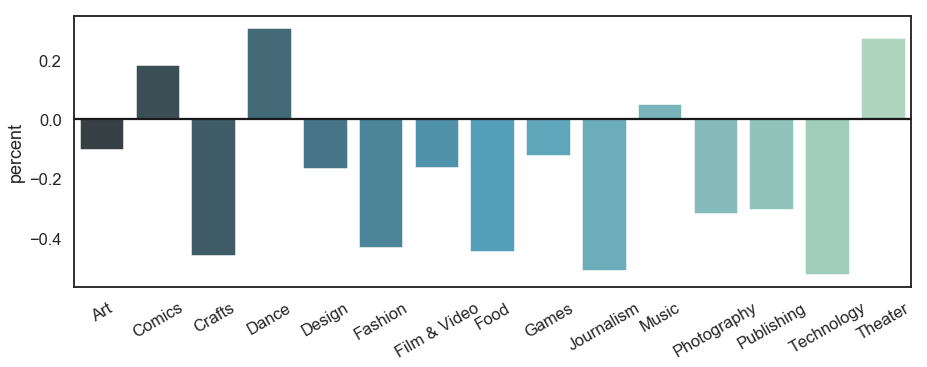

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set(style="white", context="talk")
f, ax1 = plt.subplots(figsize=(15,5))

# Generate some sequential data
x = category_names
y1 = difference
g = sns.barplot(x=x, y=y1, palette="GnBu_d")
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("percent")
g.set_xticklabels(g.get_xticklabels(), rotation=30)

label = ["{:.2%}".format(x) for x in difference]


In [95]:
successful_list_1 = successful_df['country'].tolist()

In [96]:
failed_list_1 = failed_df['country'].tolist()

In [97]:
from collections import Counter
list1_1=successful_list
counts_s_1 = Counter(list1_1)
print(counts_s_1)

Counter({'Music': 24105, 'Film & Video': 23612, 'Games': 12518, 'Publishing': 12300, 'Art': 11510, 'Design': 10549, 'Theater': 6534, 'Technology': 6433, 'Food': 6085, 'Comics': 5842, 'Fashion': 5593, 'Photography': 3305, 'Dance': 2338, 'Crafts': 2115, 'Journalism': 1012})


In [98]:
list2_1=failed_list
counts_f_1 = Counter(list2_1)
print(counts_f_1)

Counter({'Film & Video': 32891, 'Publishing': 23113, 'Music': 21696, 'Technology': 20613, 'Games': 16002, 'Food': 15969, 'Design': 14814, 'Fashion': 14181, 'Art': 14130, 'Photography': 6384, 'Crafts': 5703, 'Comics': 4036, 'Theater': 3708, 'Journalism': 3136, 'Dance': 1235})


### Now let's start to engineer our features 

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df_2018.drop("state", axis=1),
                                                    df_2018["state"],
                                                    test_size=0.25,
                                                    random_state=2019)


In [100]:
y_train.value_counts(), y_test.value_counts()


(failed        148193
 successful    100403
 Name: state, dtype: int64, failed        49418
 successful    33448
 Name: state, dtype: int64)

In [101]:
X_train.shape

(248596, 14)

## One Hot Encoding

In [103]:



encoder = OneHotEncoder(drop='first', categories="auto")
encoder.fit(X_train[["main_category", "country"]])



OneHotEncoder(categorical_features=None, categories='auto', drop='first',
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [104]:
encoder.categories_

[array(['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
        'Film & Video', 'Food', 'Games', 'Journalism', 'Music',
        'Photography', 'Publishing', 'Technology', 'Theater'], dtype=object),
 array(['AT', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK',
        'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG', 'US'],
       dtype=object)]

In [105]:
len(encoder.get_feature_names(['main_category', 'country']))

35

In [106]:
encoder.transform(X_train[["main_category", "country"]])

<248596x35 sparse matrix of type '<class 'numpy.float64'>'
	with 477651 stored elements in Compressed Sparse Row format>

In [107]:
encoder.get_feature_names(["main_category", "country"])

array(['main_category_Comics', 'main_category_Crafts',
       'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games',
       'main_category_Journalism', 'main_category_Music',
       'main_category_Photography', 'main_category_Publishing',
       'main_category_Technology', 'main_category_Theater', 'country_AU',
       'country_BE', 'country_CA', 'country_CH', 'country_DE',
       'country_DK', 'country_ES', 'country_FR', 'country_GB',
       'country_HK', 'country_IE', 'country_IT', 'country_JP',
       'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG', 'country_US'],
      dtype=object)

In [108]:
ohe = pd.DataFrame(encoder.transform(X_train[["main_category", "country"]]).toarray(),
                  columns=encoder.get_feature_names(["main_category", "country"]))


In [109]:
X_train = X_train.reset_index(drop=True)

In [110]:
X_train.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1426698687,RAPPY: The 3D printer with position feedback c...,3D Printing,Technology,USD,2014-02-16,100000.0,2014-01-16 04:48:30,21543.00,49,US,21543.00,21543.00,100000.00
1,1633937505,Unborn in America - A New Cabaret Opera,Musical,Theater,GBP,2014-12-03,2500.0,2014-11-06 23:41:21,2600.00,74,GB,4162.44,4078.30,3921.45
2,815178419,The Chronicles of Count Carlos: Son of Dracula,Comic Books,Comics,USD,2016-09-01,12000.0,2016-07-03 19:39:13,12813.01,193,US,629.00,12813.01,12000.00
3,344407855,Hidden Love Letters,Video Games,Games,EUR,2017-11-10,500.0,2017-10-10 10:03:54,723.00,106,FR,44.60,842.59,582.70
4,2037941839,Do You Have An Outdoor Grill? Use It To Roast ...,Food,Food,USD,2016-05-10,199000.0,2016-04-10 02:44:49,104.00,6,US,104.00,104.00,199000.00


In [111]:
X_train.shape


(248596, 14)

In [112]:
ohe.shape


(248596, 35)

In [113]:
y_train.shape

(248596,)

In [114]:
X_train['launched_datetime'] = pd.to_datetime(X_train['launched'])
X_train['deadline_datetime'] = pd.to_datetime(X_train['deadline'])
X_train['project_times'] = pd.to_datetime(X_train['deadline']) - pd.to_datetime(X_train['launched'])
'''This extracts the project days from the total project time'''
X_train['project_length'] = X_train.project_times.dt.days



In [115]:
X_train = X_train.drop(["category", "launched_datetime",'deadline_datetime',"main_category", "country", "name",
                       "currency", "launched", 'project_times',"backers", "pledged", "usd_pledged_real",
                       "usd pledged", "deadline"], axis=1)


In [116]:
X_train2 = pd.concat(objs=[X_train, ohe], axis=1)

In [117]:
X_train.shape, X_train2.shape, ohe.shape

((248596, 4), (248596, 39), (248596, 35))

## Model 1: Decision Tree Classifier

In [118]:
X_train2.head()

,ID,goal,usd_goal_real,project_length,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1426698687,100000.0,100000.00,30,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1633937505,2500.0,3921.45,26,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,815178419,12000.0,12000.00,59,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,344407855,500.0,582.70,30,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2037941839,199000.0,199000.00,29,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [119]:
X_train2.shape

(248596, 39)

In [120]:
clf = DecisionTreeClassifier(random_state=2019,
                             min_samples_leaf=30,
                             criterion="gini",
                             min_samples_split=2)

clf.fit(X_train2, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2019, splitter='best')

In [57]:
# # Create DOT data
# dot_data = tree.export_graphviz(clf, 
#                                 out_file=None, 
#                                 feature_names=X_train.columns,  
#                                 class_names=["failed", "successful"])

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())

## How well did our model do? 

In [121]:
encoder = OneHotEncoder(drop='first', categories="auto")
encoder.fit(X_test[["main_category", "country"]])

OneHotEncoder(categorical_features=None, categories='auto', drop='first',
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [122]:
ohe = pd.DataFrame(encoder.transform(X_test[["main_category", "country"]]).toarray(),
                   columns=encoder.get_feature_names(["main_category", "country"]))
ohe.head()

,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [123]:
X_test = X_test.reset_index(drop=True)

In [124]:
X_test['launched_datetime'] = pd.to_datetime(X_test['launched'])
X_test['deadline_datetime'] = pd.to_datetime(X_test['deadline'])
X_test['project_times'] = pd.to_datetime(X_test['deadline']) - pd.to_datetime(X_test['launched'])
'''This extracts the project days from the total project time'''
X_test['project_length'] = X_test.project_times.dt.days

In [125]:
X_test = X_test.drop(["category", "launched_datetime",'deadline_datetime',"main_category", "country", "name",
                       "currency", "launched", 'project_times',"backers", "pledged", "usd_pledged_real",
                       "usd pledged", "deadline"], axis=1)

In [126]:
X_test2 = pd.concat(objs=[X_test, ohe], axis=1)

In [127]:
clf = DecisionTreeClassifier(random_state=2019,
                             min_samples_leaf=30,
                             criterion="gini",
                             min_samples_split=2)

clf.fit(X_test2, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2019, splitter='best')

In [128]:
# # Create DOT data
# dot_data = tree.export_graphviz(clf, 
#                                 out_file=None, 
#                                 feature_names=X_train.columns,  
#                                 class_names=["failed", "successful"])

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())

In [129]:
y_pred = clf.predict(X_test2)

In [130]:
y_pred = pd.Series(y_pred)

In [131]:
y_train = y_train.replace('successful', 1)
y_train = y_train.replace('failed', 0)

y_test = y_test.replace('successful', 1)
y_test = y_test.replace('failed', 0)

y_pred = y_pred.replace('successful', 1)
y_pred = y_pred.replace('failed', 0)

In [132]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :69.94786764173485

AUC is :0.67

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,7215,3509,10724
1,5079,2365,7444
All,12294,5874,18168


## Optimizing Model 1

Now we will prune our decision tree

We can prune our trees using the following parameters:

Maximum Depth
Reduce the depth of the tree to build a generalized tree. 

Minimum Samples Leaf with Split
Restrict the size of sample leaf

Minimum Leaf Sample Size
Size in terminal nodes can be fixed to 30, 100, 300 or 5% of total

Maximum Leaf Nodes
Reduce the number of leaf nodes

Maximum Features
Maximum number of features to consider when splitting a node

In [133]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

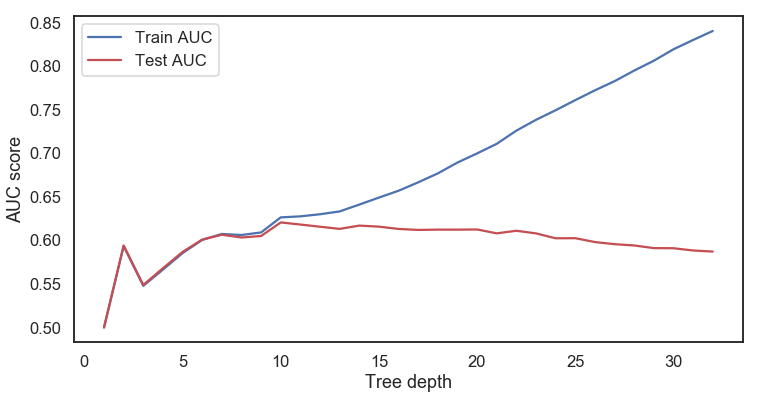

In [134]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
   dt.fit(X_train2, y_train)
   train_pred = dt.predict(X_train2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

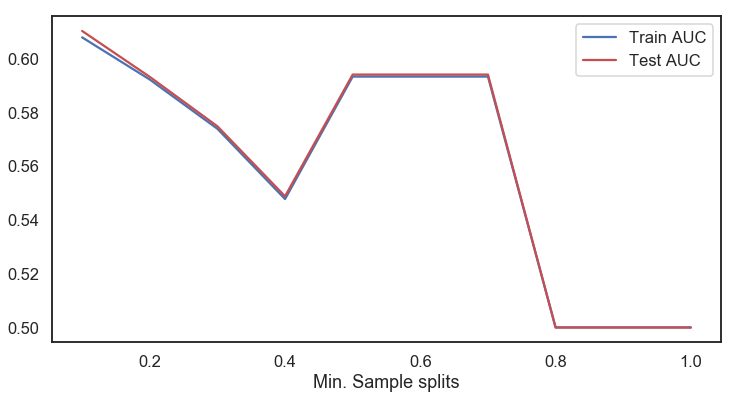

In [135]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
   dt.fit(X_train2, y_train)
   train_pred = dt.predict(X_train2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

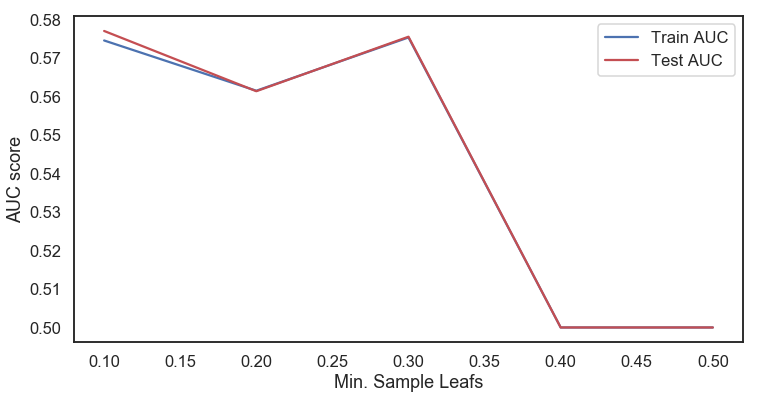

In [136]:
# Calculate the optimal value for minimum sample leafs

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
   dt.fit(X_train2, y_train)
   train_pred = dt.predict(X_train2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    

plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()    

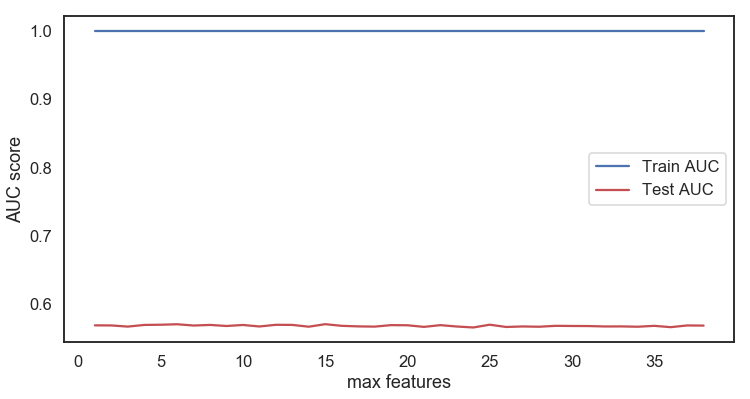

In [137]:
# Find the best value for optimal maximum feature size
max_features = list(range(1,X_train2.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature)
   dt.fit(X_train2, y_train)
   train_pred = dt.predict(X_train2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

    
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()   

In [138]:
# train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=4,
                           max_depth=7,
                           min_samples_split=0.8,
                           min_samples_leaf=0.4)
dt.fit(X_train2, y_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5683248576695109

## Model 2: Ensemble Methods

Build a regular decision tree

In [139]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(X_train2, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [140]:
from datetime import datetime
startTime = datetime.now()

#do something
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(X_train2, y_train)
print(datetime.now() - startTime)


0:00:00.580028


In [141]:
from sklearn.metrics import confusion_matrix, classification_report
pred = tree_clf.predict(X_test2)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[32180 17238]
 [17210 16238]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65     49418
           1       0.49      0.49      0.49     33448

    accuracy                           0.58     82866
   macro avg       0.57      0.57      0.57     82866
weighted avg       0.58      0.58      0.58     82866



In [142]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))


Testing Accuracy for Decision Tree Classifier: 58.43%


Build a bagged tree

In [143]:
from sklearn.ensemble import BaggingClassifier

In [144]:
from datetime import datetime
startTime = datetime.now()

#do something
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=7), n_estimators=20)
bagged_tree.fit(X_train2, y_train)
print(datetime.now() - startTime)

0:00:11.037569


In [145]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=7), n_estimators=20)
bagged_tree.fit(X_train2, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=7,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [147]:
print(bagged_tree.score(X_train2, y_train))
print(bagged_tree.score(X_test2, y_test))

0.6482123606172263
0.6480462433326093


Build a random forest

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
from datetime import datetime
startTime = datetime.now()

#do something
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train2, y_train)
print(datetime.now() - startTime)

0:00:10.048038


In [150]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train2, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
forest.score(X_train2, y_train)


0.6416314019533701

## Model 3: Adaboost

In [152]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [153]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

In [154]:
from datetime import datetime
startTime = datetime.now()

#do something
adaboost_clf.fit(X_train2, y_train)
print(datetime.now() - startTime)

0:00:08.873564


In [155]:
from datetime import datetime
startTime = datetime.now()

#do something
gbt_clf.fit(X_train2, y_train)
print(datetime.now() - startTime)

0:00:29.510599


In [156]:
adaboost_clf.fit(X_train2, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [157]:
gbt_clf.fit(X_train2, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [158]:
adaboost_train_preds = adaboost_clf.predict(X_train2)
adaboost_test_preds = adaboost_clf.predict(X_test2)
gbt_clf_train_preds = gbt_clf.predict(X_train2)
gbt_clf_test_preds = gbt_clf.predict(X_test2)

In [159]:
from sklearn.metrics import f1_score

In [160]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.6593670051006453
F1-Score: 0.5134731399023269

Model: Gradient Boosted Trees
Accuracy: 0.6621023668924682
F1-Score: 0.5046760935454578

Testing Metrics
Model: AdaBoost
Accuracy: 0.6620568146163686
F1-Score: 0.5178706700640452

Model: Gradient Boosted Trees
Accuracy: 0.663842830593971
F1-Score: 0.5054855316882655


In [161]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[39822,  9596],
       [18408, 15040]])

In [162]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[40773,  8645],
       [19211, 14237]])

In [163]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.68      0.81      0.74     49418
           1       0.61      0.45      0.52     33448

    accuracy                           0.66     82866
   macro avg       0.65      0.63      0.63     82866
weighted avg       0.65      0.66      0.65     82866



In [164]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.68      0.83      0.75     49418
           1       0.62      0.43      0.51     33448

    accuracy                           0.66     82866
   macro avg       0.65      0.63      0.63     82866
weighted avg       0.66      0.66      0.65     82866



## Looking at scores, which one matters most? 

As a rule of thumb, if the cost of having False negative is high, we want to increase the model sensitivity and recall!

On the other hand, if the cost of having False positive is high, then we want to increase the model specificity and precision! 

In our case, a false negative is -- the project would do well on kickstarter but we classified it as failing -- and a false positive is -- the project would fail on kickstarter but we classified it as successful.

The cost of our False positive is higher

## K Means Clustering

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabaz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
ss = StandardScaler()
scaled_data = ss.fit_transform(X_train2)

In [ ]:
scaled_df=pd.DataFrame(data=scaled_data)

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_data, columns=['pca1', 'pca2'])

In [ ]:
model = KMeans(n_clusters=3, random_state=10).fit(pca_df) # Must set number of clusters at initialization time!
model_label = model.labels_
model_centers= model.cluster_centers_

# cluster predictions for each point are also stored in k_means.labels_ attribute

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(pca_df['pca1'], pca_df['pca2'],
                    c=model_label, s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='*');

In [ ]:
pca.components_